<a href="https://colab.research.google.com/github/keetrak17/keetrak_leranbay_project/blob/main/Cifar_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
# import all the libraries
import tensorflow
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.datasets import cifar10

In [30]:
 # loading the dataset
 (x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [31]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)
(50000, 1)
(10000, 1)


In [32]:
classes = ['airplane','autoobile','bird','cat','deer','dog','frog','horse','ship','truck']

'truck'

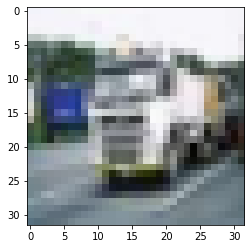

In [33]:
# visuaizing the data
plt.imshow(x_train[1000])
classes[y_train[1000][0]]

In [34]:
# normalise the image
x_train, x_test = x_train/255, x_test/255

In [35]:
# 1) model architecture
# 2) compile
# 3) fit

In [36]:
# model architecture
model = Sequential()
# Conv layer 1
model.add(Conv2D(filters = 10, kernel_size = 3,strides = 1,padding = 'valid',activation = 'relu',kernel_initializer='he_normal'))
model.add(MaxPool2D())

# Conv layer 2
model.add(Conv2D(filters = 20, kernel_size = 3,strides = 1,padding = 'valid',activation = 'relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D())

# Conv layer 3
model.add(Conv2D(filters = 40, kernel_size = 3,strides = 1,padding = 'valid',activation = 'relu',kernel_initializer='he_uniform'))
model.add(MaxPool2D())
# no of filters usually double for every additional conv layer
# flatten
model.add(Flatten())

# hidden layer 1
model.add(Dense(128, activation = 'sigmoid'))

# hidden layer 2
model.add(Dense(64, activation = 'relu'))

# hidden layer 3
model.add(Dense(32, activation = 'sigmoid'))

# output layer 
model.add(Dense(10, activation ='softmax'))



In [39]:
# copile
model.compile(optimizer='adam', loss = tensorflow.keras.losses.SparseCategoricalCrossentropy(), metrics = ['accuracy'])

In [40]:
# fit
model.fit(x_train, y_train, epochs= 50,batch_size =32)

Epoch 1/50
1563/1563 [==============================] - 36s 5ms/step - loss: 1.7681 - accuracy: 0.3418
Epoch 2/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4229 - accuracy: 0.4827
Epoch 3/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2842 - accuracy: 0.5384
Epoch 4/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1918 - accuracy: 0.5725
Epoch 5/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.1177 - accuracy: 0.6022
Epoch 6/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0642 - accuracy: 0.6233
Epoch 7/50
1563/1563 [==============================] - 8s 5ms/step - loss: 1.0129 - accuracy: 0.6437
Epoch 8/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9764 - accuracy: 0.6573
Epoch 9/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.9361 - accuracy: 0.6713
Epoch 10/50
1563/1563 [==============================] - 8s 5ms/step - loss: 0.90

In [41]:
# test data evaluation
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 1.3966 - accuracy: 0.6241


[1.3966140747070312, 0.6241000294685364]

In [42]:
y_pred = model.predict(x_test)

In [44]:
y_pred[0]

array([1.4168012e-05, 5.5907125e-04, 9.1506243e-03, 5.6208456e-01,
       4.7163069e-03, 3.9980200e-01, 5.4469337e-03, 1.4674435e-02,
       3.3920816e-05, 3.5179786e-03], dtype=float32)

In [64]:
image_row = 1001

In [65]:
import numpy as np
classes[np.argmax(y_pred[image_row])]

'truck'

'airplane'

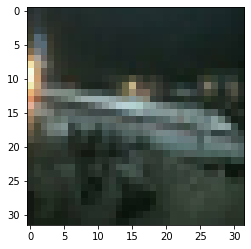

In [66]:
plt.imshow(x_test[image_row])
classes[y_test[image_row][0]]